In [286]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [287]:
def remap_colors(img):
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return new_img

def show(img_path, remap=True):
    img = cv2.imread(img_path, -1)
    if remap:
        img_remap = remap_colors(img)
        plt.imshow(img_remap)
    else:
        plt.imshow(img)

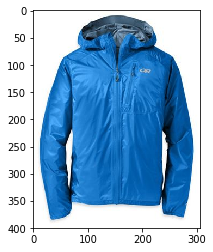

In [288]:
show('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg',True)

In [289]:
img = cv2.imread('data/gear_images/axes/100172.jpeg', 0)

In [301]:
def pad(img_path):
    img = cv2.imread(img_path,-1)
    
    img = remap_colors(img)
    
    min_dim, max_dim = sorted(img.shape[:2])
    diff = max_dim - min_dim
    
    is_height = img.shape[0] == min(img.shape)
    
    new = cv2.copyMakeBorder(img,(diff//2)*is_height, (diff//2)*is_height, (diff//2)*(1-is_height), (diff//2)*(1-is_height), cv2.BORDER_CONSTANT, value=[255,255,255])
    
    plt.imshow(new)
    
    return new

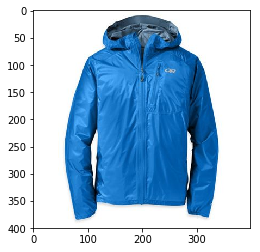

In [302]:
paddedImg = pad('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg')

In [303]:
def reshape(img):
    return cv2.resize(img, (128, 128))

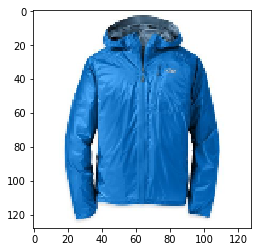

In [304]:
plt.imshow(reshape(pad('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg')))

In [305]:
def equalize(img):
    
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    
    return img_output

In [306]:
def transform(img_path):
    padded_img = pad(img_path)
    equalized = equalize(padded_img)
    reshaped = reshape(equalized)
    plt.imshow(reshaped)
    return reshaped

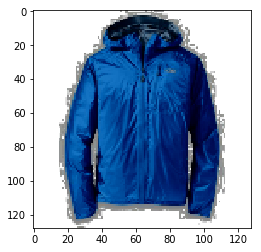

In [307]:
x = transform('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg')

In [308]:
def plot_histo(img_path):
    
    img = cv2.imread(img_path,0)
    hist,bins = np.histogram(img.flatten(),255,[0,255])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.hist(img.flatten(),255,[0,255], color = 'r')
    plt.xlim([0,250])
    plt.ylim([0,1000])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

def plot_histo_2(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hist,bins = np.histogram(img.flatten(),255,[0,255])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.hist(img.flatten(),255,[0,255], color = 'r')
    plt.xlim([0,250])
    plt.ylim([0,1000])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

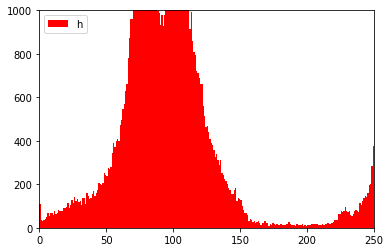

In [309]:
plot_histo('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg')

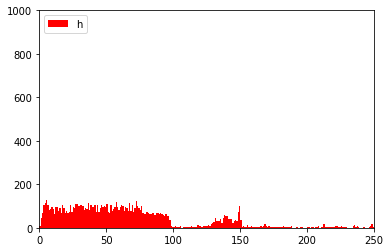

In [310]:
plot_histo_2(x)

harnesses
crampons
rope
insulated_jackets
tents
gloves
hardshell_jackets
carabiners
boots
axes
pulleys
helmets


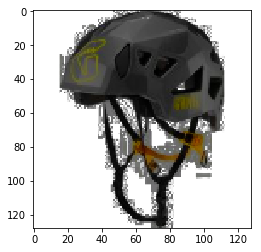

In [311]:
import os

path_output = 'output_challenge2'

for item_category in os.listdir('data/gear_images'):
    print(item_category)
    try:
        os.mkdir('output_challenge2/'+ item_category+'_transformed')
    except:
        pass
    for item in os.listdir('data/gear_images/' + item_category):
        new_array = transform('data/gear_images/' + item_category + '/' + item)
        new_array.tofile('output_challenge2/'+ item_category+'_transformed/'+item+'.dat')

Original shape : (400, 307, 3)
New shape : (400, 399, 3)


(128, 128, 3)

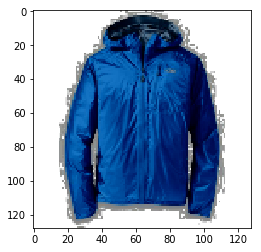

In [285]:
transform('data/gear_images/hardshell_jackets/10185324x1013303_zm.jpeg').shape